In [94]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.initializers import GlorotNormal
from keras.optimizers import SGD

In [95]:
class DenseNeuralNetwork(tf.keras.models.Sequential):

    def __init__(self, features_dim, neurons = 10, layers = 3, activation = 'sigmoid'):
        super(DenseNeuralNetwork, self).__init__()
        
        init = GlorotNormal()
        
        # Input layer:
        self.add(Dense(units = neurons,
                       input_dim = features_dim,
                       activation = activation,
                       kernel_initializer = init,
                       bias_initializer = init))
        
        # Add dense layers in sequence
        for i in range(layers):
            self.add(Dense(units = neurons,
                           activation = activation,
                           kernel_initializer = init,
                           bias_initializer = init))
        
        # Output layer:
        self.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [96]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def PrintMetrics(cmat, y_test, pred):
    # separate out the confusion matrix components
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]
    # calculate F1 score, Recall scores, precision scores
    f1Score = round(f1_score(y_test, pred), 2)
    recallScore = round(recall_score(y_test, pred), 2)
    precisionScore = round(precision_score(y_test, pred), 2)
    # calculate and display metrics
    print(cmat)
    print( 'Accuracy: '+ str(np.round(100*float(tpos+fneg)/float(tpos+fneg + fpos + tneg),2))+'%')
    print("Sensitivity/Recall: {recall_score}".format(recall_score = recallScore))
    print("Precision: {precision_score}".format(precision_score = precisionScore))
    print("F1 Score: {f1_score} \n".format(f1_score = f1Score))

In [98]:
# Generate the feature matrix X
data = pd.read_csv('data/model/app_io.csv.gz');

print(data.columns)

X = data.drop(['date', 'app_number', 'ticker', 'y_ret', 'y_bin'], axis = 1).to_numpy()

# Absolute value:
X_train, X_test, Y1_train, Y1_test = train_test_split(X, data['y_ret'].to_numpy(), random_state=0)

# Up/Down:
X_train, X_test, Y2_train, Y2_test = train_test_split(X, data['y_bin'].to_numpy(), random_state=0)

X_dim = np.size(X, axis=1)

Index(['date', 'app_number', 'cited_patent_number', 'num_inventor',
       'patent_num_claims', 'ticker', 'num_app_prior', 'topic0', 'topic1',
       'topic2',
       ...
       'topic92', 'topic93', 'topic94', 'topic95', 'topic96', 'topic97',
       'topic98', 'topic99', 'y_ret', 'y_bin'],
      dtype='object', length=109)


In [99]:
print(np.size(Y2_train))
print(np.size(X_train, axis = 0))
Y2_train

7545
7545


array([0., 1., 0., ..., 0., 0., 1.])

In [100]:
# Using the Stochastic Grading Descent optimizer
model1 = DenseNeuralNetwork(features_dim = X_dim, neurons = 110, layers = 10)

#opt = SGD(lr = 0.01, momentum = 0.9)

model1.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mean_absolute_error'])

model1.summary()

# Using the ADAM optimizer
model2 = DenseNeuralNetwork(features_dim = X_dim, neurons = 110, layers = 10)

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['mse', 'mean_absolute_error'])

model2.summary()

Model: "dense_neural_network_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_213 (Dense)            (None, 110)               11550     
_________________________________________________________________
dense_214 (Dense)            (None, 110)               12210     
_________________________________________________________________
dense_215 (Dense)            (None, 110)               12210     
_________________________________________________________________
dense_216 (Dense)            (None, 110)               12210     
_________________________________________________________________
dense_217 (Dense)            (None, 110)               12210     
_________________________________________________________________
dense_218 (Dense)            (None, 110)               12210     
_________________________________________________________________
dense_219 (Dense)            (None, 110)   

In [103]:
epochs = 50
batch_size = 32 #X_train.size

tb_callback = tf.keras.callbacks.TensorBoard('./logs', update_freq=1)

model1_history = model1.fit(X_train, Y1_train, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[tb_callback])

DNN1_predmoict = model1.predict(X_test);

Epoch 1/50
236/236 [==============================] - 1s 4ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 2/50
236/236 [==============================] - 1s 3ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 3/50
236/236 [==============================] - 1s 4ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 4/50
236/236 [==============================] - 1s 4ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 5/50
236/236 [==============================] - 1s 4ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 6/50
236/236 [==============================] - 1s 6ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 7/50
236/236 [==============================] - 1s 6ms/step - loss: nan - mse: nan - mean_absolute_error: nan: 3s - loss:
Epoch 8/50
236/236 [==============================] - 1s 4ms/step - loss: nan - mse: nan - mean_absolute_error: nan
Epoch 9/50
236/236 [==============================] - 1s 4ms

KeyboardInterrupt: 

In [119]:
from sklearn.linear_model import LinearRegression

print(pd.DataFrame(Y1_train).describe())
print(pd.DataFrame(X_train).isna().sum())

print(np.isnan(X).sum())
LinearRegression().fit(X_train, Y1_train)

                 0
count  7334.000000
mean      0.004166
std       0.037091
min      -0.227293
25%      -0.015002
50%       0.004187
75%       0.023686
max       0.471701
0      0
1      0
2      0
3      0
4      0
      ..
99     0
100    0
101    0
102    0
103    0
Length: 104, dtype: int64
0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [102]:
model2_history = model2.fit(X_train, Y2_train, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[tb_callback])

Epoch 1/50
236/236 [==============================] - 1s 4ms/step - loss: 0.6866 - mse: 0.2467 - mean_absolute_error: 0.4908
Epoch 2/50
236/236 [==============================] - 1s 4ms/step - loss: 0.6875 - mse: 0.2471 - mean_absolute_error: 0.4914
Epoch 3/50
236/236 [==============================] - 1s 3ms/step - loss: 0.6862 - mse: 0.2465 - mean_absolute_error: 0.4908
Epoch 4/50
236/236 [==============================] - 1s 3ms/step - loss: 0.6851 - mse: 0.2460 - mean_absolute_error: 0.4904
Epoch 5/50
236/236 [==============================] - 1s 3ms/step - loss: 0.6846 - mse: 0.2458 - mean_absolute_error: 0.4904
Epoch 6/50
236/236 [==============================] - 1s 4ms/step - loss: 0.6854 - mse: 0.2461 - mean_absolute_error: 0.4906
Epoch 7/50
236/236 [==============================] - 1s 4ms/step - loss: 0.6850 - mse: 0.2459 - mean_absolute_error: 0.4907
Epoch 8/50
236/236 [==============================] - 1s 4ms/step - loss: 0.6848 - mse: 0.2458 - mean_absolute_error: 0.4905


In [83]:
model2_predict = model2.predict(X_test);
model2_predict

array([[0.38279963],
       [0.40834796],
       [0.613754  ],
       ...,
       [0.5592414 ],
       [0.45886764],
       [0.46419126]], dtype=float32)

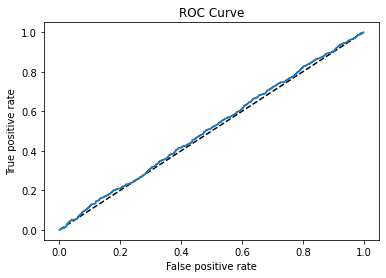

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc(fpr, tpr, title='ROC Curve', note=''):
    """
    Function to plot an ROC curve in a consistent way.
    The fpr and tpr parameters can be created by the sklearn roc_curve() function.
    
    Args:
        fpr        False Positive Rate (list of multiple points)
        tpr        True Positive Rate (list of multiple points)
        title      Title above the plot
        note       Note to display in the bottom-right of the plot
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()
    
fpr, tpr, _ = roc_curve(Y2_test, model2_predict)
plot_roc(fpr, tpr)

In [ ]:
from sklearn. import LinearRegression

LinearRegression()